In [38]:
#Importing neccessary python modules.
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import *
from math import ceil

In [39]:
#Loading the HAL AIRPORT WIND SPEED DATA MEASURED AT 10m above the ground level.
data = pd.read_excel('/content/HAL AIRPORT WIND SPEED DATA.xlsx') #reading the data
data=data.astype(float)  #coverting to float type.
data.head() #Displaying the contents of the file.

,HAL airport windspeed (10m)
0,2.520000
1,3.671294
2,4.693825
3,5.241679
4,5.001280


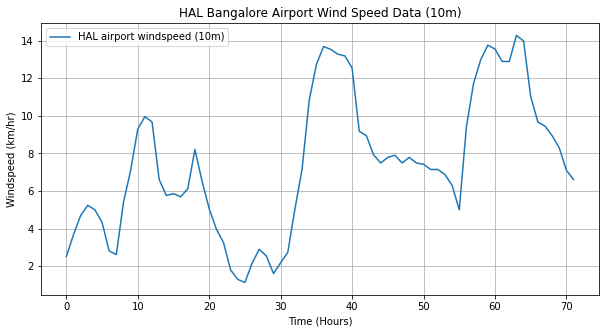

In [55]:
#Plotting the original data
data.plot(figsize=(10,5))
# naming the x axis 
plt.xlabel('Time (Hours)') 
# naming the y axis 
plt.ylabel('Windspeed (km/hr)')  
# giving a title to the graph 
plt.title('HAL Bangalore Airport Wind Speed Data (10m)') 
#adding grid
plt.grid()
#showing the plot 
plt.show() 

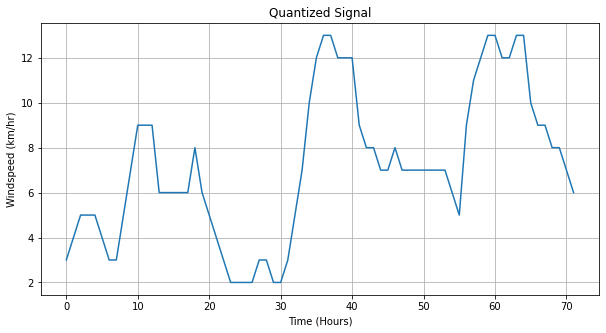

In [42]:
# Original signal is preprocessed to get the values in a list format
original=data.values.tolist()
for i in range(len(original)):
   original[i]=original[i][0]
#For Quantization we do step up quantization.
lenght_ofseq=len(original) 
n=7 #bits
od=[] #list to store quantized signal
q=lenght_ofseq/(2**(n-1)) #quantization step
for i in original: #quantizing all data points
  x0=ceil(i/q) #step up quantization
  od.append(x0) #appending it to the quantization list
plt.figure(figsize=(10,5))
plt.plot(od) #plotting the quantized signal
# naming the x axis 
plt.xlabel('Time (Hours)') 
# naming the y axis 
plt.ylabel('Windspeed (km/hr)')  
# giving a title to the graph 
plt.title('Quantized Signal') 
plt.grid() #adding grid
plt.show() #display

In [43]:
#defining a function - Adaptive delta modulation named as admod
def admod(data,Delta,nqc=2): 
#parameters - data-input data, delta-minimum step size, nqc - sample step
#initializing a numpy array 'op' of lenght of data with all zeros
  op=np.zeros(len(data)) 
  step_up_count = 0 #registering the number of previous consecutive step ups taken
  step_down_count = 0 #registering the number of previous consecutive down ups taken
  sig = 0 #signal_value
  #Running a for loop for the data range, with sampling freq as step size 
  for i in range(0,len(data),nqc): 
    if data[i]==sig: 
      pass #if the data point value = signal value then just pass
    elif data[i]>sig: #if the data point value > signal value then:
      if step_up_count <=2:
         #Just step up by one times delta when previous consecutive step up <=2
        sig+=Delta 
      elif step_up_count <=3:
         #Step up by 3 times delta when previous consecutive step up <=3
              sig+= 3*Delta
      elif step_up_count <=6:
         #Step up by 4 times delta when previous consecutive step up <=6
              sig+= 4*Delta
      else:
        #Else step up by 5 times delta 
              sig+=5*Delta
      if sig < data[i]:
         #if still signal value < actual signal value then step up by one for next loop
              step_up_count+= 1
      else:
        #else reset the count
              step_up_count = 0

    else:
       #The data point value > signal value then:
      if step_down_count <=2:
        #Just step down by one times delta when previous consecutive step up <=2
        sig-= Delta  
      elif step_down_count <=3:
        #Step down by 3 times delta when previous consecutive step up <=3
              sig-=3*Delta
      elif step_down_count <=6:
        #Step down by 4 times delta when previous consecutive step up <=6
              sig-=4*Delta
      else:
        #Else step down by 5 times delta
              sig-= 5*Delta
      if sig > data[i]:
         #if still signal value > actual signal value then step down by one for next loop
              step_down_count+= 1
      else:
        #else reset the count
              step_down_count = 0
    #Add the signal result to op array after each interation
    op[i:i+nqc]=sig
  #Return op list as output from the function call
  return op

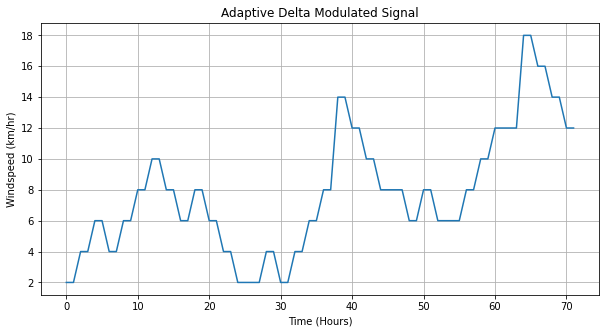

In [44]:
#Calling the function to modulate the signal using Adaptive delta modulation
k=admod(od,2) #od- input signal, Delta value is 2
#Plotting the adative delta modulated signal
plt.figure(figsize=(10,5))
plt.plot(k)
# naming the x axis 
plt.xlabel('Time (Hours)') 
# naming the y axis 
plt.ylabel('Windspeed (km/hr)')  
# giving a title to the graph 
plt.title('Adaptive Delta Modulated Signal') 
#Adding grid
plt.grid()
plt.show() 

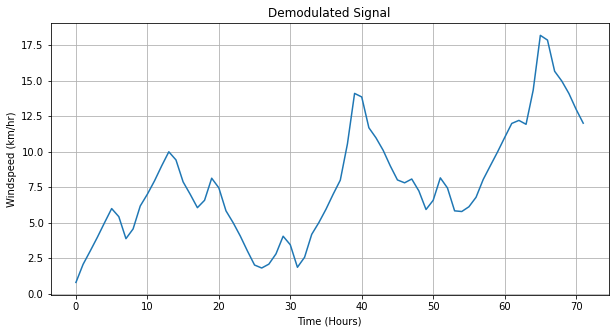

In [45]:
from scipy import signal
#We pass this signal through a Butterworth LPF to demodulate the modulated signal
#Parameters:
#Order=2
#At 0.6 the gain drops to 1/sqrt(2) that of the passband (the “-3 dB point”)
#Type- Lowpass
sos = signal.butter(2, 0.6, 'low',output='sos')
#Filtering the signal.
filtered = signal.sosfilt(sos, k)
#plotting the demodulated signal
plt.figure(figsize=(10,5))
plt.plot(filtered)
# naming the x axis 
plt.xlabel('Time (Hours)') 
# naming the y axis 
plt.ylabel('Windspeed (km/hr)')  
# giving a title to the graph 
plt.title('Demodulated Signal') 
#Adding grid
plt.grid()
plt.show() 

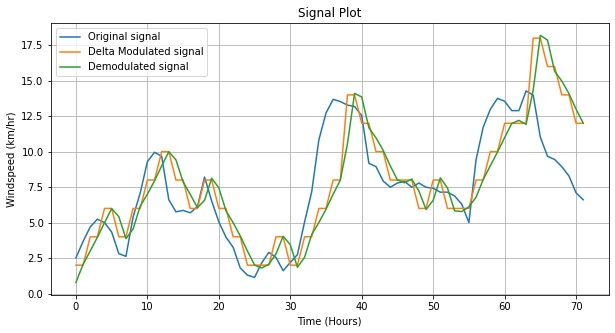

In [46]:
#Plotting the Original signal, Delta modulated signal & Demodulated signal
plt.figure(figsize=(10,5))
plt.plot(data)
plt.plot(k)
plt.plot(filtered)
plt.legend(["Original signal", "Delta Modulated signal","Demodulated signal"])
# naming the x axis 
plt.xlabel('Time (Hours)') 
# naming the y axis 
plt.ylabel('Windspeed (km/hr)')  
# giving a title to the graph 
plt.title('Signal Plot') 
#Adding grid
plt.grid()
plt.show() 

In [48]:
#Getting the demodulated signal values
demod=filtered.tolist()
#Analysis
sqdiff_list=[]
summation = 0  #variable to store the summation of differences
n = len(filtered) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = demod[i]-original[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  sqdiff_list.append(squared_difference**0.5) #appending the absolute difference to the list
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error between the original signal and demodulated signal is: " , MSE)

The Mean Square Error between the original signal and demodulated signal is:  9.156524343273608


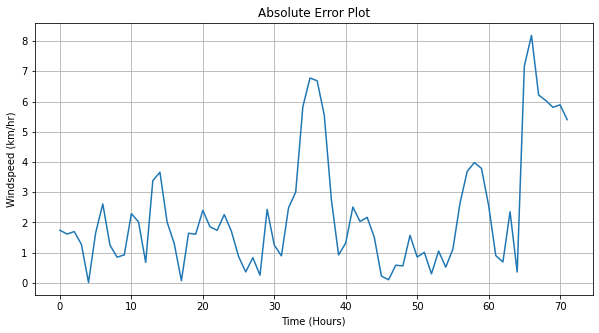

In [49]:
#Plotting the absolute error graph between the original signal and demodulated signal
plt.figure(figsize=(10,5))
plt.plot(sqdiff_list)
# naming the x axis 
plt.xlabel('Time (Hours)') 
# naming the y axis 
plt.ylabel('Windspeed (km/hr)')  
# giving a title to the graph 
plt.title('Absolute Error Plot') 
#Adding grid
plt.grid()
plt.show() 

In [50]:
#Finding the correlation between the original signal and the demodulated signal
from scipy.stats.stats import pearsonr   #Importing necessary module
#Finding the correlation coefficient
correlation, p_value = pearsonr(original,demod) 
print ('The correlation between the original signal and the demodulated signal is:',correlation,'.')

The correlation between the original signal and the demodulated signal is: 0.6904472009376824 .
